# Fundamentos de Data Science

## Analizando la Satisfacción de Clientes en la Industria Hotelera

### Requisitos:


Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado [aquí](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

### 1. Limpieza de datos con Python:

* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

### 2. Exploración de datos con Python:

* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### 3. Análisis adicional.

* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

### Entrega

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

# Resolución

### Lectura inicial de datos.

In [63]:
import pandas as pd

camino_dataset = "../data/hotel_bookings.csv"
df = pd.read_csv(camino_dataset, delimiter=",")

# Como no se ven todas las columnas, se debe setear esta opción:
# Obtenido de: https://stackoverflow.com/a/66816128
pd.set_option('display.max_columns', len(df.columns))
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [64]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [65]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Limpieza de datos con Python

Primero que nada, verificamos si es que existe algún dato nulo en el dataset.

In [66]:
from utils import obtener_estadisticas_datos_nulos

df_estadisticas = obtener_estadisticas_datos_nulos(df)
df_estadisticas

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00


Lo que se puede notar de las estadísticas de datos nulos, es que hay una enorme cantidad de nulos en company  por lo que se procede a explorar cual podría ser el motivo de falta de estos datos y si se puede hacer algo al respecto.

In [67]:
# Se verifica las compañías únicas en el dataset.

companhias_unicas = df["company"].unique()
companhias_unicas

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

Como es una gran cantidad de datos, y al parecer son numéricos, es posible que estos datos correspondan a un ID único numérico de empresa.

Se procede a saber cuantas empresas existen

In [68]:
cantidad_companhias_unicas = len(df[df["company"].notna()]["company"].unique())

print(f"Cant. de Compañías únicas: {cantidad_companhias_unicas}")

Cant. de Compañías únicas: 352


Es posible que estos datos falten pero puedan ser inferidos desde los nombres del hotel, en otros datos en el dataset, por lo cual se verifica que tipo de datos se almacenan en la columna hotel.

In [69]:
hoteles_unicos = df["hotel"].unique()

print(f"Cant. de Hoteles únicos: {len(hoteles_unicos)}")

Cant. de Hoteles únicos: 2


In [70]:
# Como solamente hay dos hoteles, la columna de hotel es posiblemente una columna categórica.
print(f"Categorías de Hoteles: {str(hoteles_unicos)}")

Categorías de Hoteles: ['Resort Hotel' 'City Hotel']


Como la columna no indica nombre de hotel, sino más bien una categoría, no se puede usar este dato para inferir el ID de la compañía.

Investigamos también otras columnas categóricas por si se pudiera encontrar algo.

In [71]:
market_segments = df["market_segment"].unique()
distribution_channels = df["distribution_channel"].unique()
customer_types = df["customer_type"].unique()

print(f"Segmentos de mercado: {str(market_segments)}")
print(f"Canales de distribución: {str(distribution_channels)}")
print(f"Tipos de clientes: {str(customer_types)}")

Segmentos de mercado: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Canales de distribución: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Tipos de clientes: ['Transient' 'Contract' 'Transient-Party' 'Group']


Al ser difícil el análisis columna por columna, es posible simplificar e iterar sobre todas y verificar que cantidad de datos son únicos.

In [72]:
for column_name in df.columns:
    cant_unicos = len(df[column_name].unique())
    print(f"Cant. únicos {column_name}: {cant_unicos}")

Cant. únicos hotel: 2
Cant. únicos is_canceled: 2
Cant. únicos lead_time: 479
Cant. únicos arrival_date_year: 3
Cant. únicos arrival_date_month: 12
Cant. únicos arrival_date_week_number: 53
Cant. únicos arrival_date_day_of_month: 31
Cant. únicos stays_in_weekend_nights: 17
Cant. únicos stays_in_week_nights: 35
Cant. únicos adults: 14
Cant. únicos children: 6
Cant. únicos babies: 5
Cant. únicos meal: 5
Cant. únicos country: 178
Cant. únicos market_segment: 8
Cant. únicos distribution_channel: 5
Cant. únicos is_repeated_guest: 2
Cant. únicos previous_cancellations: 15
Cant. únicos previous_bookings_not_canceled: 73
Cant. únicos reserved_room_type: 10
Cant. únicos assigned_room_type: 12
Cant. únicos booking_changes: 21
Cant. únicos deposit_type: 3
Cant. únicos agent: 334
Cant. únicos company: 353
Cant. únicos days_in_waiting_list: 128
Cant. únicos customer_type: 4
Cant. únicos adr: 8879
Cant. únicos required_car_parking_spaces: 5
Cant. únicos total_of_special_requests: 6
Cant. únicos rese

Al parecer, no es posible inferir la compañía de ninguna manera, por lo cual simplemente se llena con un valor predeterminado.

In [73]:
# Corroboramos primeramente cual es el ID menor de compañía en el dataset.

minimo_id_companhia = df[df["company"].notna()]["company"].min()

print(f"Mínimo ID compañía: {minimo_id_companhia}")

Mínimo ID compañía: 6.0


Como la ID mínima es 6.0, se marca como company = 0 todos los que tengan datos vacíos, y generalmente en las bases de datos se empieza con id = 1, así que es probablemente seguro usar esta convención. Mas adelante se analizará este caso.

In [74]:
df["company"] = df.apply(lambda x: x["company"] if not pd.isna(x["company"]) else 0.0, axis=1)

Miramos de vuelta los valores nulos.

In [75]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00


Ahora, verificamos por el caso de los agentes. Verificamos en caso de que por si acaso estén relacionados con la compañía

In [76]:
df[df["agent"].isna()][["company", "agent"]]

,company,agent
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
6,0.0,NaN
18,110.0,NaN
...,...,...
119124,72.0,NaN
119151,0.0,NaN
119166,0.0,NaN
119215,0.0,NaN


In [77]:
df[(df["agent"].isna()) & (df["company"] > 0.0)][["company", "agent"]]

,company,agent
18,110.0,NaN
218,110.0,NaN
219,110.0,NaN
220,110.0,NaN
295,113.0,NaN
...,...,...
119119,451.0,NaN
119122,451.0,NaN
119123,451.0,NaN
119124,72.0,NaN


Verificamos por ej en el caso de company 110.0 si es que el agente siempre es el mismo.

In [78]:
df[(df["agent"].notna()) & (df["company"] == 110.0)][["company", "agent"]]

,company,agent


In [79]:
df[(df["agent"].notna()) & (df["company"] == 451.0)][["company", "agent"]]

,company,agent


Para generalizar, simplemente verificamos para todos los casos en el que el agent sea na y company sea mayor a 0, y vemos si existe algun valor, ya que en las pruebas anteriores no se detectó nada.

In [80]:
df_agentes_con_companhia = df[(df["agent"].isna()) & (df["company"] > 0.0)]

companhias_unicas = df_agentes_con_companhia.groupby("company")["company"].unique()

df[(df["company"].isin(companhias_unicas)) & df["agent"].notna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Como se puede ver, tampoco se puede encontrar el dato, por lo que en este caso la estrategia también es marcar con id = 0 siempre que no existan agentes con id menor o igual a 0

In [81]:
id_minima_agente = df["agent"].min()

print(f"ID Mínima de agente: {id_minima_agente}")

ID Mínima de agente: 1.0


In [82]:
# Seteamos la ID del agente como 0 ya que la ID mínima es 1.

df["agent"] = df.apply(lambda x: x["agent"] if not pd.isna(x["agent"]) else 0.0, axis=1)

Volvemos a imprimir estadísticas de valores nulos.

In [83]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
country,118902,488,0.41
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00
company,119390,0,0.00


Ya solamente queda la columna country con valor nulo, por lo que procedemos a verificar si es que se puede recuperar ese dato a través del id de la compañía siempre que este sea mayor a 0.

In [84]:
ids_companhias = df[(df["country"].isna()) & df["company"] > 0]["company"].unique()

df_paises_relacionados = df[(df["company"].isin(companhias_unicas)) & df["country"].notna()][["country", "company"]]
df_paises_relacionados

,country,company
1813,PRT,204.0
7080,PRT,204.0
14008,PRT,204.0
14010,PRT,204.0
14011,PRT,204.0
14012,PRT,204.0
14013,PRT,204.0
14019,PRT,204.0
14022,PRT,204.0
14023,PRT,204.0


Al parecer, en este caso si existen algunas compañias que nos pueden indicar el país, por lo que se procede a llenar los datos cuando las columnas estén vacías.

In [85]:
# Creamos un diccionario en el cual la clave será la compañía y el valor el país.
dict_companhia_pais = {}

for _, row in df_paises_relacionados.iterrows():
    dict_companhia_pais[row[1]] = row[0]


def _agregar_dato_pais(x):
    if pd.isna(x["country"]) and not pd.isna(x["company"]) and x["company"] in dict_companhia_pais:
        return dict_companhia_pais[x["company"]]
    return x["country"]


df["country"] = df.apply(_agregar_dato_pais, axis=1)

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_61226/1251113327.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_companhia_pais[row[1]] = row[0]


Mostramos de vuelta estadísticas de valores nulos

In [86]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
country,118922,468,0.39
hotel,119390,0,0.00
previous_cancellations,119390,0,0.00
reservation_status,119390,0,0.00
total_of_special_requests,119390,0,0.00
required_car_parking_spaces,119390,0,0.00
adr,119390,0,0.00
customer_type,119390,0,0.00
days_in_waiting_list,119390,0,0.00
company,119390,0,0.00


Con esta técnica se redujo en 20 la cantidad de nulos en países, y finalmente, se opta por rellenar country con UKNOWN si es que no se conoce

In [87]:
cant_paises_unknown = df[df["country"] == "UNKNOWN"].shape[0]

print(f"Cant. países con UNKNOWN: {cant_paises_unknown}")

Cant. países con UNKNOWN: 0


In [88]:
df["country"] = df.apply(lambda x: x["country"] if not pd.isna(x["country"]) else "UNKNOWN", axis=1)

In [89]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
hotel,119390,0,0.0
is_canceled,119390,0,0.0
reservation_status,119390,0,0.0
total_of_special_requests,119390,0,0.0
required_car_parking_spaces,119390,0,0.0
adr,119390,0,0.0
customer_type,119390,0,0.0
days_in_waiting_list,119390,0,0.0
company,119390,0,0.0
agent,119390,0,0.0


Se verifica la columna de niños

In [90]:
df[df["children"].isna()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


En estos casos, se opta por rellenar los datos con 0

In [91]:
df.loc[df[df["children"].isna()].index, "children"] = 0

Volvemos a analizar estadísticas del dataset

In [92]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
hotel,119390,0,0.0
is_canceled,119390,0,0.0
reservation_status,119390,0,0.0
total_of_special_requests,119390,0,0.0
required_car_parking_spaces,119390,0,0.0
adr,119390,0,0.0
customer_type,119390,0,0.0
days_in_waiting_list,119390,0,0.0
company,119390,0,0.0
agent,119390,0,0.0


In [93]:
paises_unicos = df["country"].unique()
print(f"Países únicos: {str(paises_unicos)}")

Países únicos: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'UNKNOWN' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA'
 'TMP' 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA'
 'LBY' 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'A

Se procede ahora a evaluar el estado de las demás columnas.

Primero que nada, se ejecuta un describe para ver el estado de todas.

In [94]:
# Para mayor facilidad al leer se usa la transpuesta.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


En el caso de lead_time, es posible visualizar rápidamente que sería ese valor máximo de 737, ya que el lead time es extraño que sea tan largo

{'whiskers': [<matplotlib.lines.Line2D at 0x123abb070>,
 'caps': [<matplotlib.lines.Line2D at 0x123abbcd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x124389c00>],
 'medians': [<matplotlib.lines.Line2D at 0x123ab8820>],
 'fliers': [<matplotlib.lines.Line2D at 0x123ab96c0>],
 'means': []}

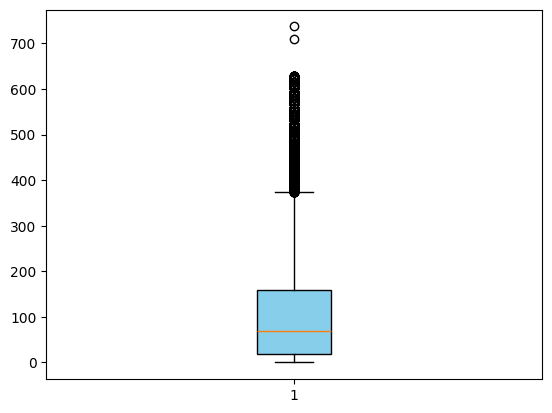

In [95]:
import matplotlib.pyplot as plt

plt.boxplot(
    df["lead_time"],
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

Al parecer, en esta columna hay una gran cantidad de outliers. No obstante, no se sabe bien si es que este dato realmente está mal ya que se debe investigar con mayor detenimiento. Por lo cual estos valores no se eliminan del dataset de momento.

Ahora, se procede a analizar los datos de fecha.

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Verificamos que los meses sean correctos.

In [97]:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [98]:
from datetime import datetime

def _crear_fecha(x):
    year = x["arrival_date_year"]
    month = x["arrival_date_month"]
    day = str(x["arrival_date_day_of_month"]).zfill(2)

    date_str = f"{year}-{month}-{day}"
    return pd.to_datetime(date_str, format="%Y-%B-%d")

df["arrival_date"] = df.apply(_crear_fecha, axis=1)


In [99]:
df["arrival_date"].describe().T

count                           119390
mean     2016-08-28 16:39:45.727447808
min                2015-07-01 00:00:00
25%                2016-03-13 00:00:00
50%                2016-09-06 00:00:00
75%                2017-03-18 00:00:00
max                2017-08-31 00:00:00
Name: arrival_date, dtype: object

In [100]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

Según los datos, la fecha de llegada está correcta ya que no se encuentra ningún valor extraño entre los mínimos y máximos.

Agregamos la columna de estadía total, ya que en el dataset está clasificado por estadía en días de fin de semana y días entre semana.

In [101]:
df["stays_nights"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

In [102]:
df["stays_nights"].describe().T

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays_nights, dtype: float64

Al notar el día mínimo 0, es importante verificar que este dato en conjunto con la columna is_canceled = 1.0 coincidan, ya que si el agendamiento se cancelo, no debería tener días de estadía en el hotel.

In [103]:
df[(df["stays_nights"] == 0.0) & (df["is_canceled"] == 0.0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stays_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,...,0,A,H,0,No Deposit,240.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,...,0,E,H,0,No Deposit,250.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,A,A,0,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,...,0,A,A,0,No Deposit,14.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,...,0,A,A,0,No Deposit,262.0,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,A,A,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,...,0,A,K,7,No Deposit,98.0,0.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,2017-08-23,0


Para no perder estos datos, por el momento se queadn así, pero es importante tener en cuenta para futuros filtros.

Fuera de esto, la duración de la estadía está en parámetros normales de acuerdo a las estadísticas.

In [104]:
# Continuamos verificando los datos
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119390.0,0.103886,0.0,0.0,0.0,0.0,10.0,0.398555
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


In [105]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [106]:
# Técnica para obtener columnas categóricas obtenida aquí: https://stackoverflow.com/a/29821799
for column_name in df.select_dtypes(include=['object']):
    if column_name in ["reservation_status_date", "arrival_date"]:
        continue

    uniques = df[column_name].unique()

    print(f"Valores únicos para {column_name}: {uniques}")

Valores únicos para hotel: ['Resort Hotel' 'City Hotel']
Valores únicos para arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Valores únicos para meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Valores únicos para country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'UNKNOWN' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT

De todas las columnas categóricas, las únicas que parece que poseen valores indefinidos son market_segment, y distribution_channel. No obstante, está completado el campo, por lo cual, no hay necesidad de seguir buscando errores en columnas categóricas.

Finalmente, la columna que posee un dato extraño, sería adr, ya que es el Average Daily Rate o el costo promedio diario. Se realiza un gráfico de esta variable para ver qué puede estar pasando.

{'whiskers': [<matplotlib.lines.Line2D at 0x12427eda0>,
 'caps': [<matplotlib.lines.Line2D at 0x12427df90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1238a3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x12427e6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12427e4d0>],
 'means': []}

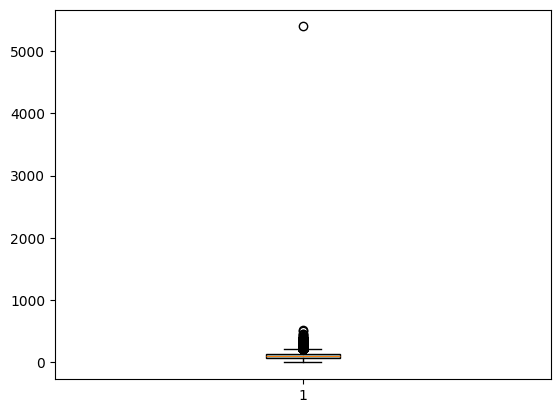

In [107]:
plt.boxplot(
    df["adr"],
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

Se nota un outlier por encima de los 5000, por lo cual se realiza un nuevo gráfico excluyendo este dato.

{'whiskers': [<matplotlib.lines.Line2D at 0x126cc0640>,
 'caps': [<matplotlib.lines.Line2D at 0x126cc1cc0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x126cc0160>],
 'medians': [<matplotlib.lines.Line2D at 0x126cc2710>],
 'fliers': [<matplotlib.lines.Line2D at 0x126cc18a0>],
 'means': []}

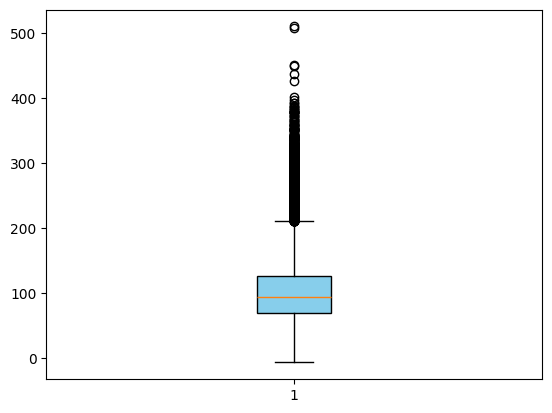

In [108]:
plt.boxplot(
    df[df["adr"] < 5000]["adr"],
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

In [109]:
# Visualizar valores en el dataset de adr < 0:

df[df["adr"] < 0.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stays_nights
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,...,2,A,H,2,No Deposit,273.0,0.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,10


Al parecer, solo existe una fila con valor negativo en este dataset. Se procede a dejarlo como 0

In [110]:
df.loc[df[df["adr"] < 0.0].index, "adr"] = 0.0

In [111]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119390.0,0.103886,0.0,0.0,0.0,0.0,10.0,0.398555
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


Fuera de esto, ya no existen valores incorrectos ni valores nulos en el dataset.

### Exploración de datos

#### Gráficos Univariados

Primero que nada, se elabora un histograma con los datos de las columnas no categóricas.

In [112]:
columnas_categoricas = []
columnas_no_categoricas = []

for column_name in df.select_dtypes(include=['object']):
    if column_name in ["reservation_status_date", "arrival_date"]:
        continue

    columnas_categoricas.append(column_name)

print(f"Cols. categóricas {str(columnas_categoricas)}")

for column_name in df.select_dtypes(exclude=['object']):
    columnas_no_categoricas.append(column_name)

print(f"Cols. no categóricas {str(columnas_no_categoricas)}")

Cols. categóricas ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
Cols. no categóricas ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'arrival_date', 'stays_nights']


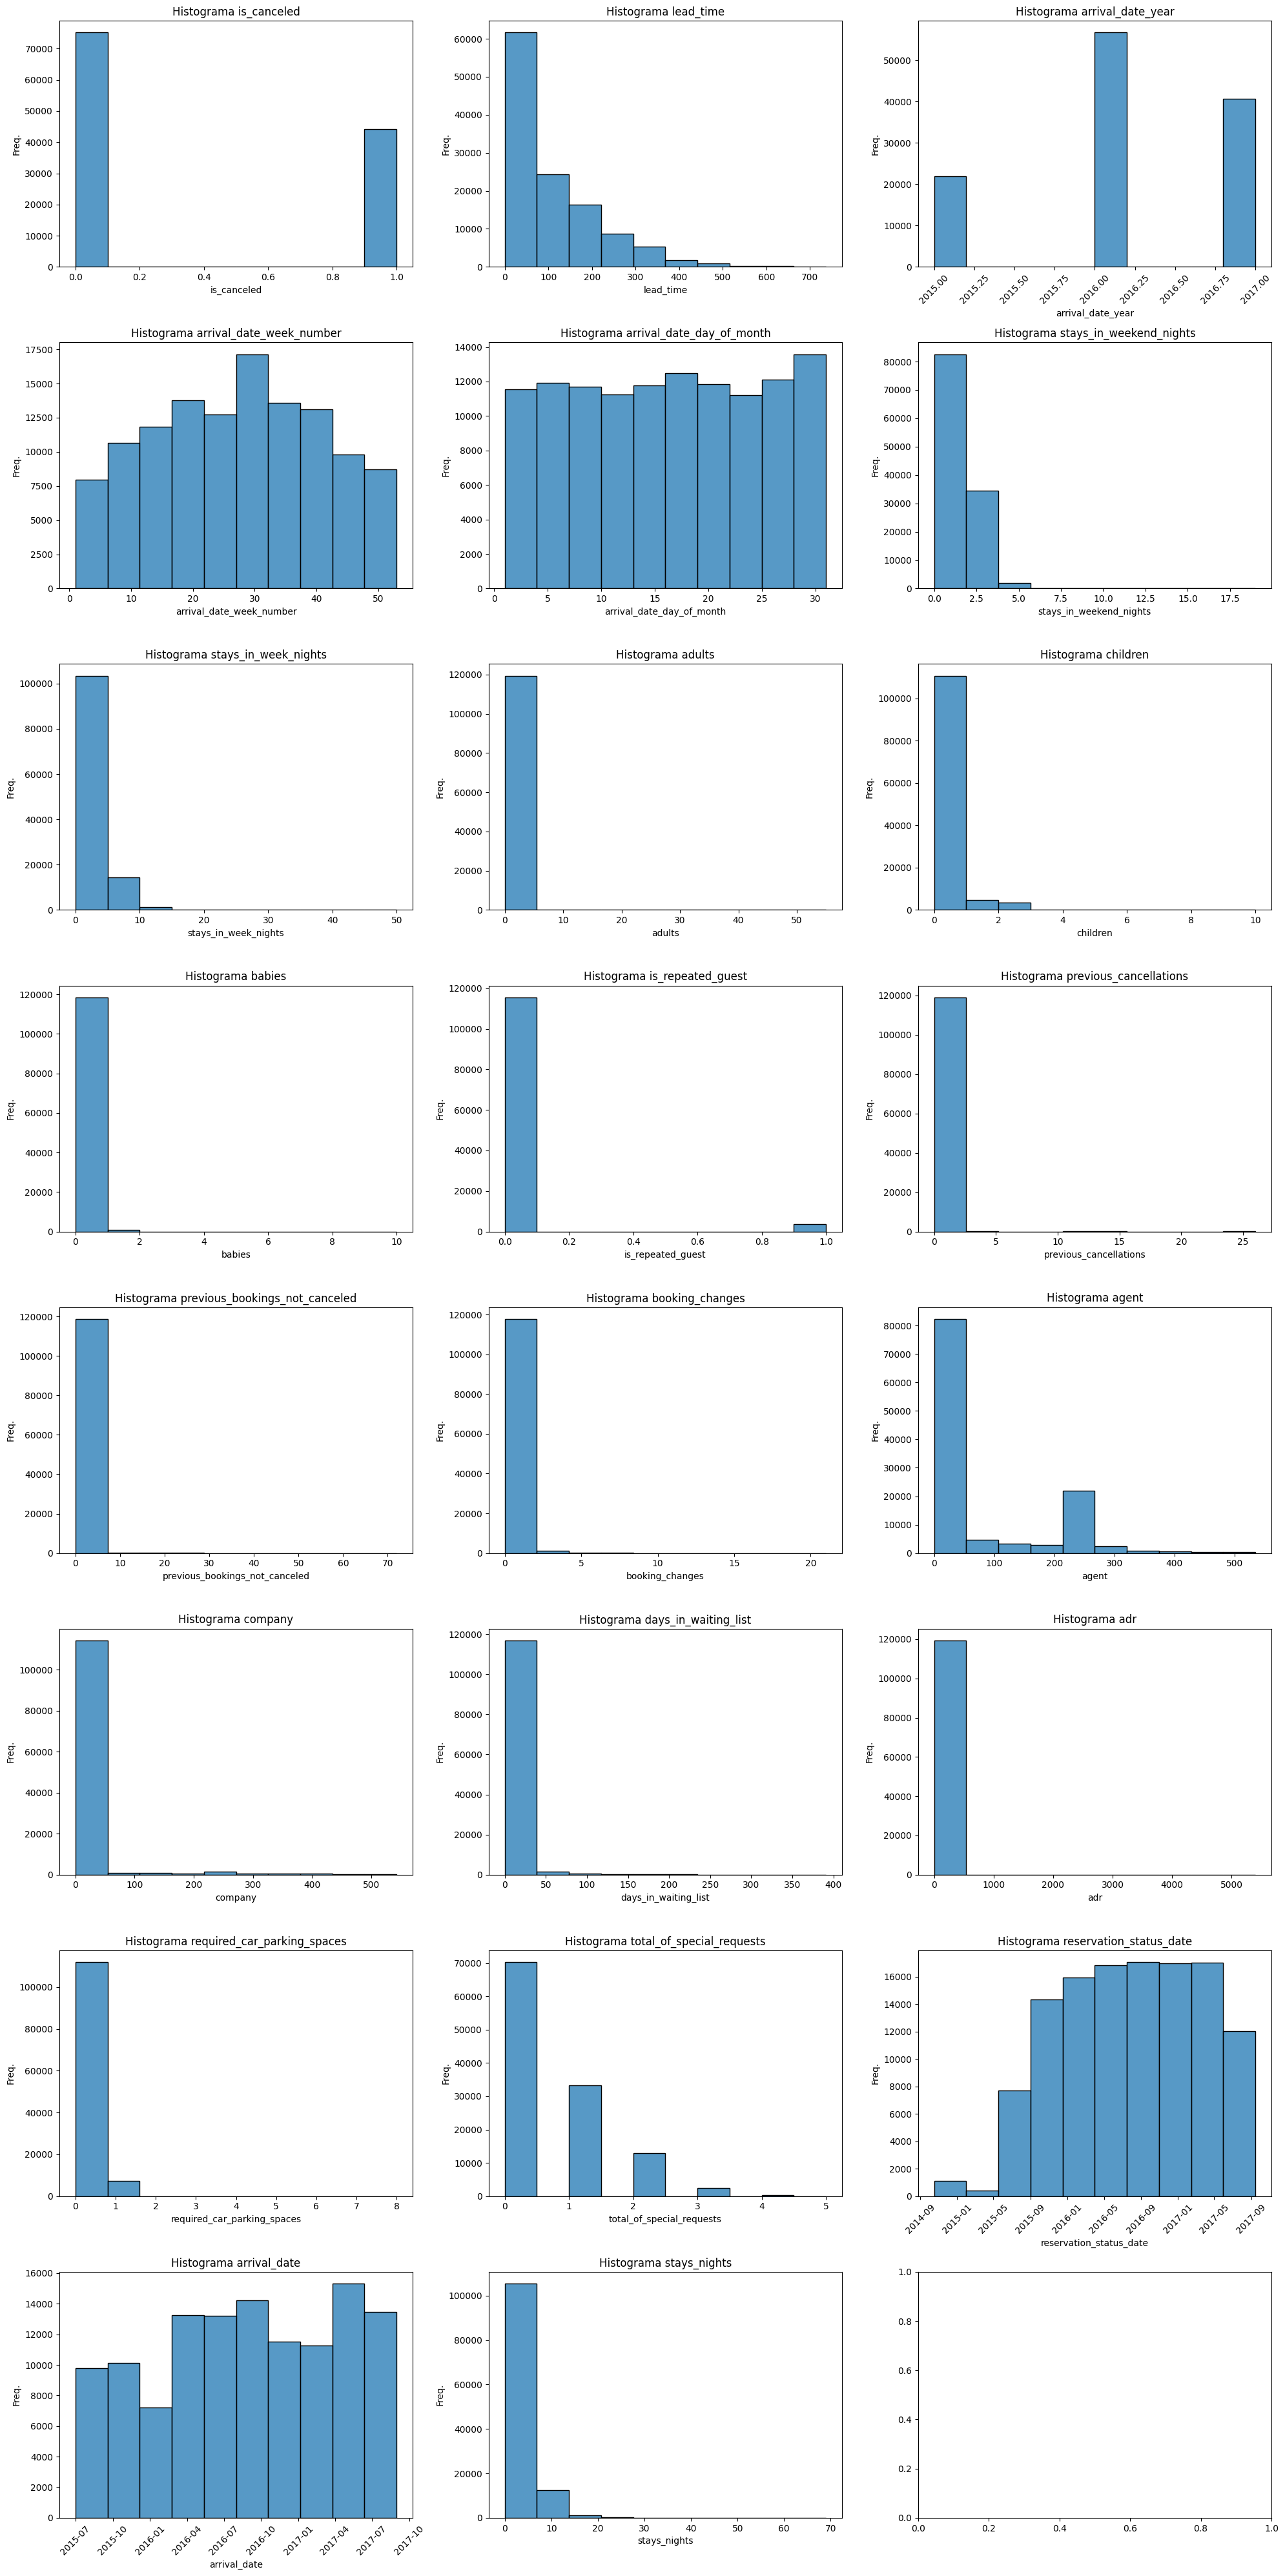

In [113]:
from utils import graficar_histogramas

graficar_histogramas(
    df,
    columnas_no_categoricas,
    bins=10,
    figsize=(20, 40),
    rotations={
        "arrival_date_year": 45,
        "arrival_date": 45,
        "reservation_status_date": 45,
    }
)


También, visualizamos los boxplots para cada variable

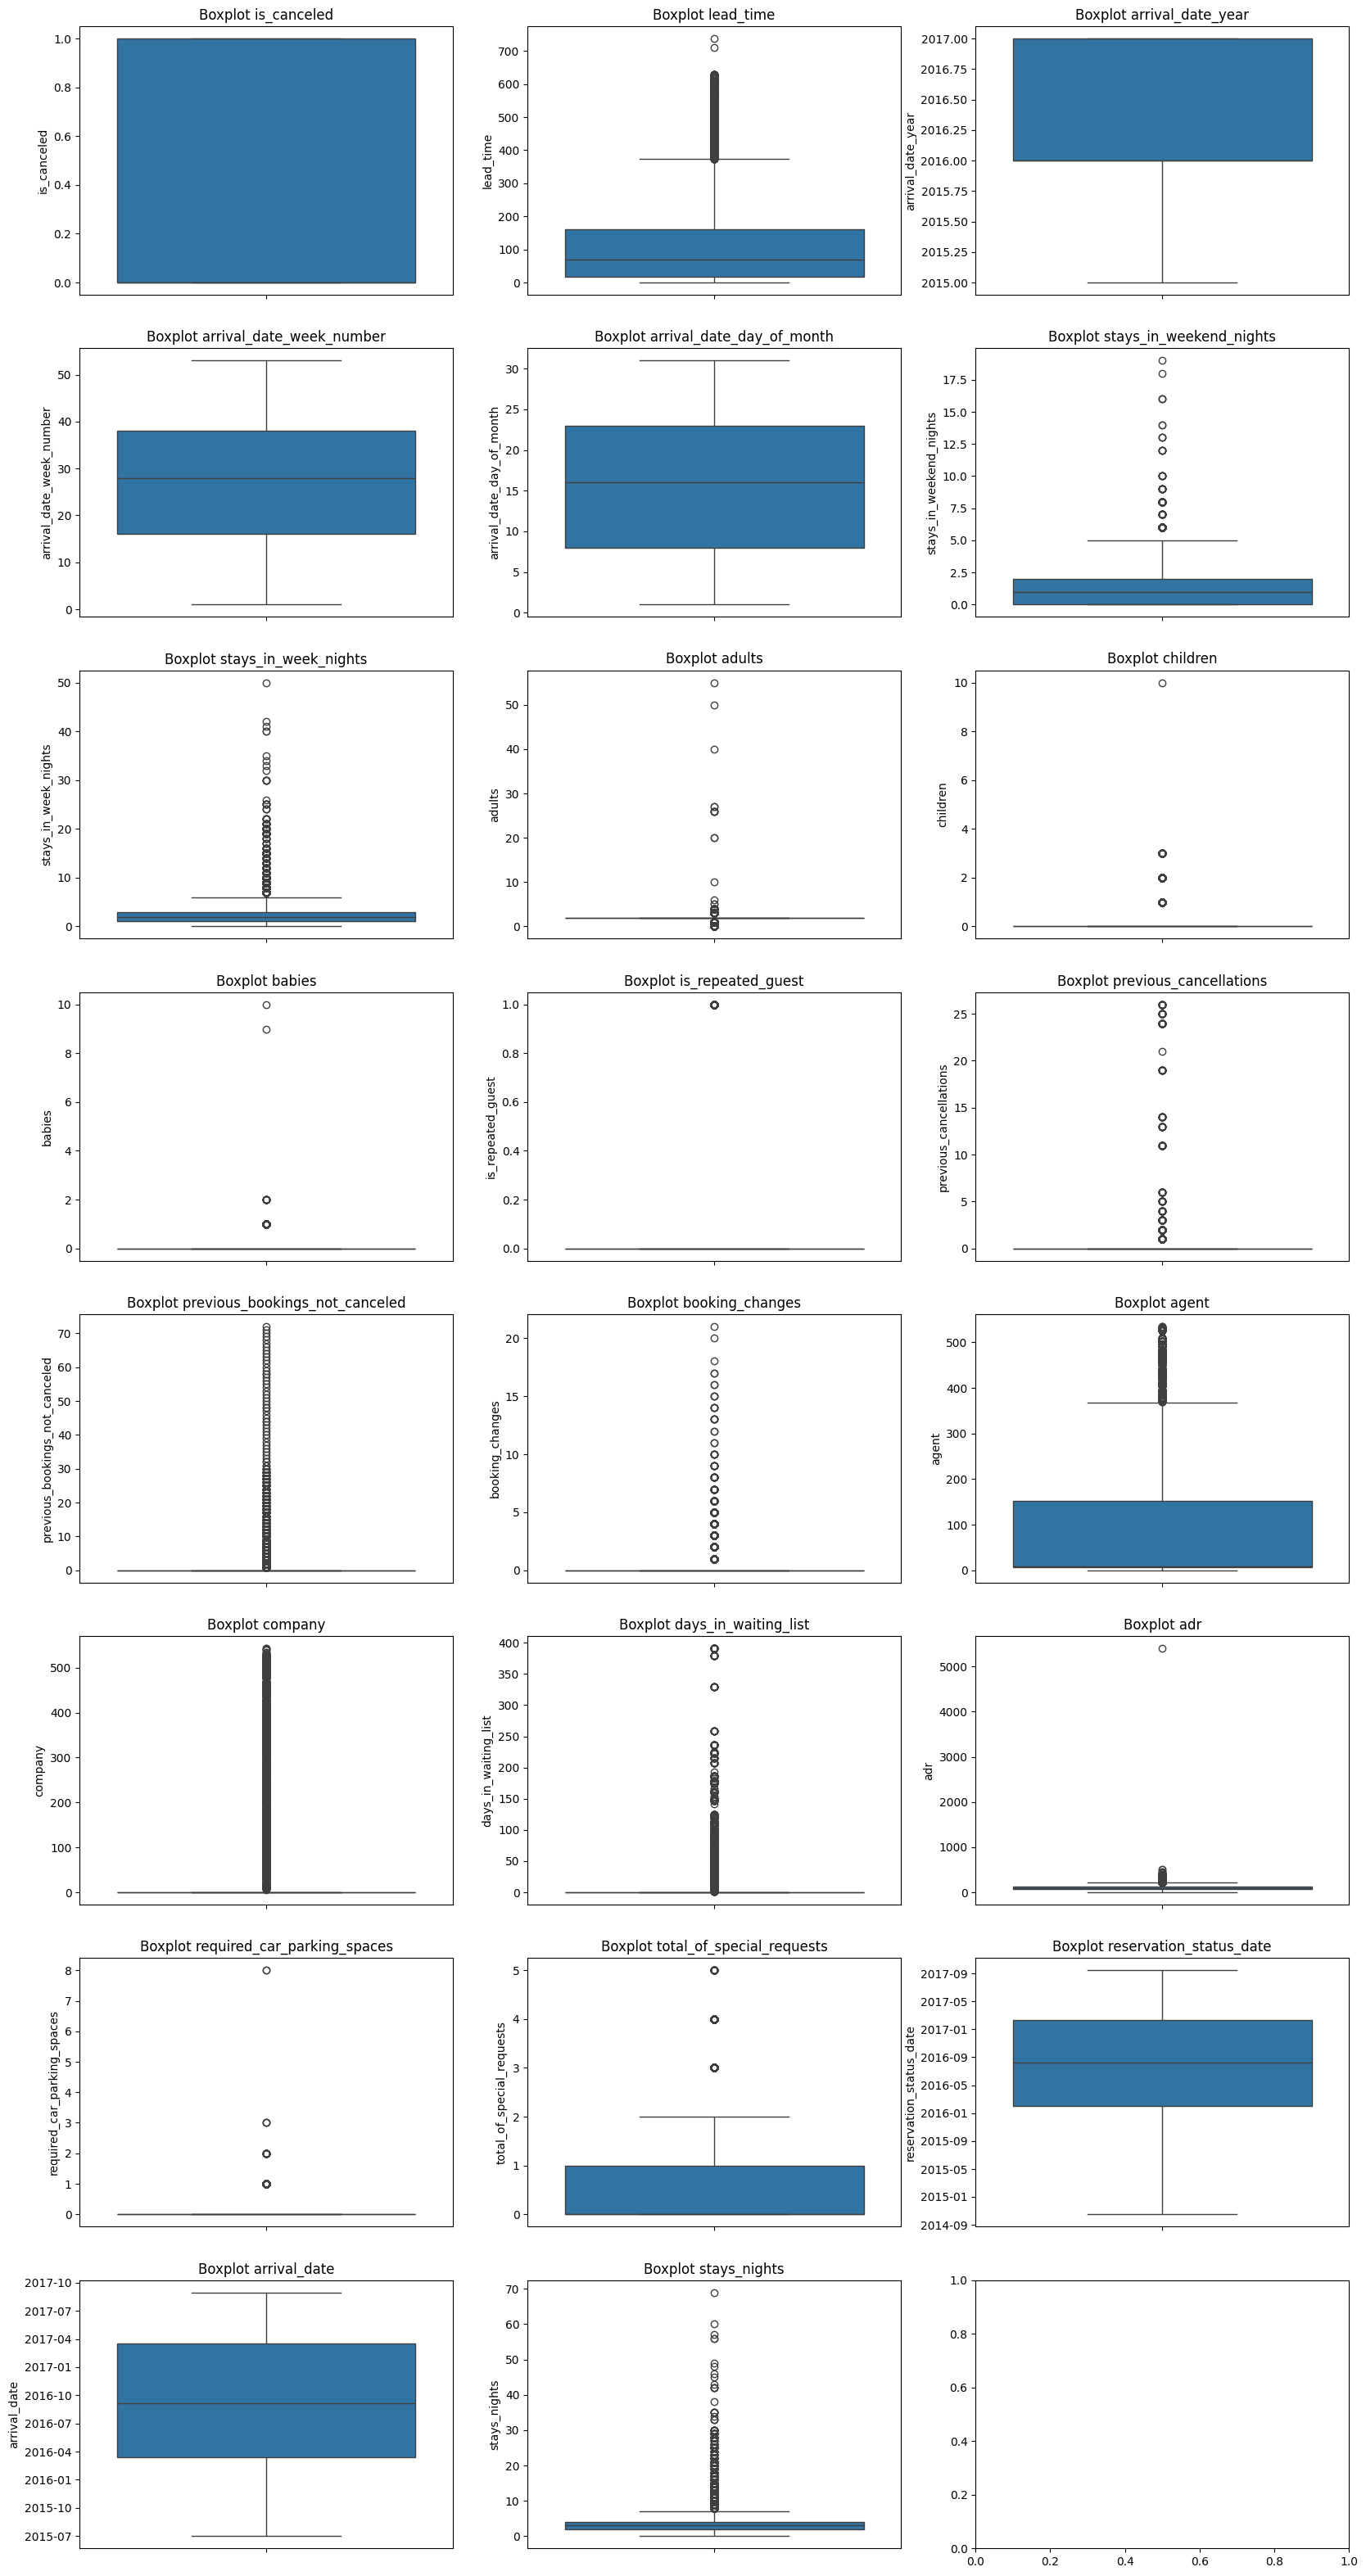

In [114]:
from utils import graficar_boxplots

graficar_boxplots(df, columnas_no_categoricas, figsize=(20, 40))

#### Gráficos multivariados

Verificamos de vuelta las columnas.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

#### Gráfico de Agendamientos por Año

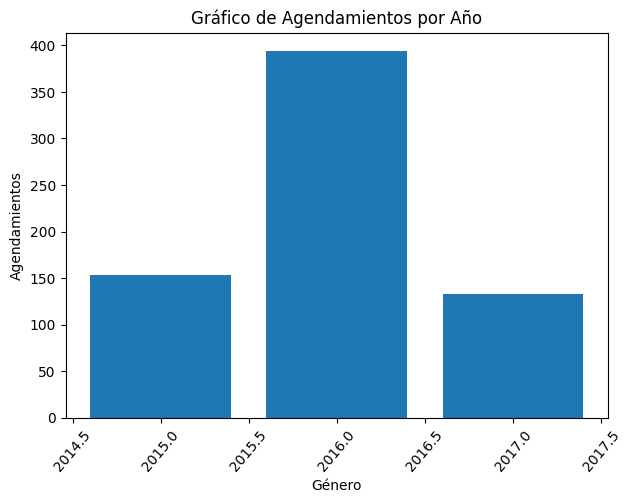

In [116]:
import matplotlib.pyplot as plt

# No mostramos agendamientos cancelados o sin días.
df_segmentos_anhos_agrupados = df[
    (df["is_canceled"] == 0.0) & (df["stays_nights"] == 0.0)
].groupby("arrival_date_year")["stays_nights"].agg("count").reset_index().sort_values("stays_nights", ascending=False)

anhos = df_segmentos_anhos_agrupados["arrival_date_year"]
reservas_totales = df_segmentos_anhos_agrupados["stays_nights"]

plt.figure(figsize=(7, 5))
plt.bar(anhos, reservas_totales)
plt.title("Gráfico de Agendamientos por Año")
plt.xlabel("Género")
plt.ylabel("Agendamientos")
plt.xticks(rotation=50)
plt.show()

#### Gráfico de Agendamientos por Segmento de Mercado

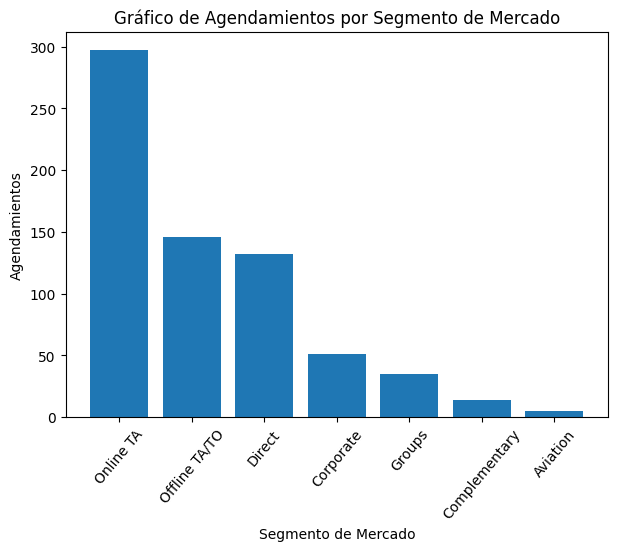

In [117]:
# No mostramos agendamientos cancelados o sin días.
df_segmentos_mercado_agrupados = df[
    (df["is_canceled"] == 0.0) & (df["stays_nights"] == 0.0)
].groupby("market_segment")["stays_nights"].agg("count").reset_index().sort_values("stays_nights", ascending=False)

segmentos_de_mercado = df_segmentos_mercado_agrupados["market_segment"]
reservas_totales = df_segmentos_mercado_agrupados["stays_nights"]

plt.figure(figsize=(7, 5))
plt.bar(segmentos_de_mercado, reservas_totales)
plt.title("Gráfico de Agendamientos por Segmento de Mercado")
plt.xlabel("Segmento de Mercado")
plt.ylabel("Agendamientos")
plt.xticks(rotation=50)
plt.show()

#### Gráfico de Agendamientos por canal de distribución

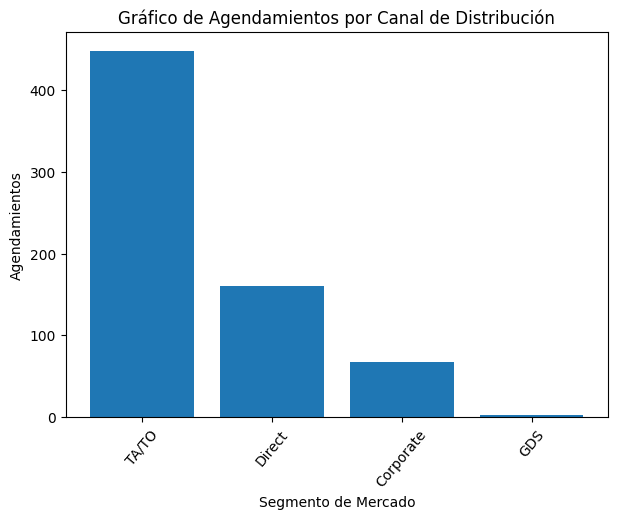

In [118]:
# No mostramos agendamientos cancelados o sin días.
df_canales_distribucion_agrupados = df[
    (df["is_canceled"] == 0.0) & (df["stays_nights"] == 0.0)
].groupby("distribution_channel")["stays_nights"].agg("count").reset_index().sort_values("stays_nights", ascending=False)

canales_distribucion = df_canales_distribucion_agrupados["distribution_channel"]
reservas_totales = df_canales_distribucion_agrupados["stays_nights"]

plt.figure(figsize=(7, 5))
plt.bar(canales_distribucion, reservas_totales)
plt.title("Gráfico de Agendamientos por Canal de Distribución")
plt.xlabel("Segmento de Mercado")
plt.ylabel("Agendamientos")
plt.xticks(rotation=50)
plt.show()

#### Gráfico de Agendamientos por país

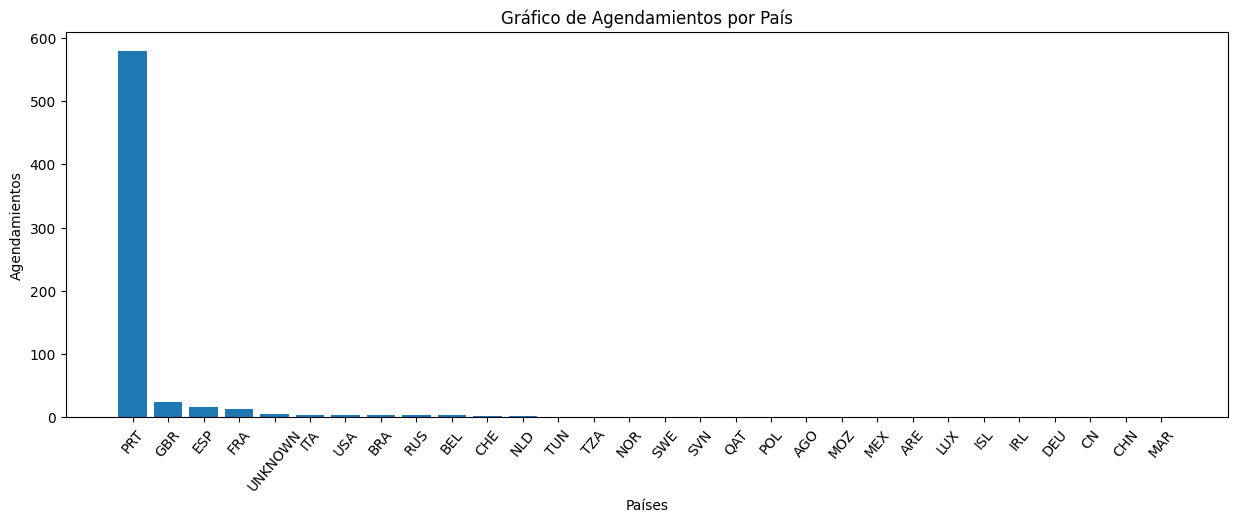

In [119]:
# No mostramos agendamientos cancelados o sin días.
df_segmentos_mercado_agrupados = df[
    (df["is_canceled"] == 0.0) & (df["stays_nights"] == 0.0)
].groupby("country")["stays_nights"].agg("count").reset_index().sort_values("stays_nights", ascending=False)

paises = df_segmentos_mercado_agrupados["country"]
reservas_totales = df_segmentos_mercado_agrupados["stays_nights"]

plt.figure(figsize=(15, 5))
plt.bar(paises, reservas_totales)
plt.title("Gráfico de Agendamientos por País")
plt.xlabel("Países")
plt.ylabel("Agendamientos")
plt.xticks(rotation=50)
plt.show()

De aquí, se puede notar que este dataset contiene mayoritariamente datos de Agendamiento de Portugal.

#### Agendamientos por tipo de depósito

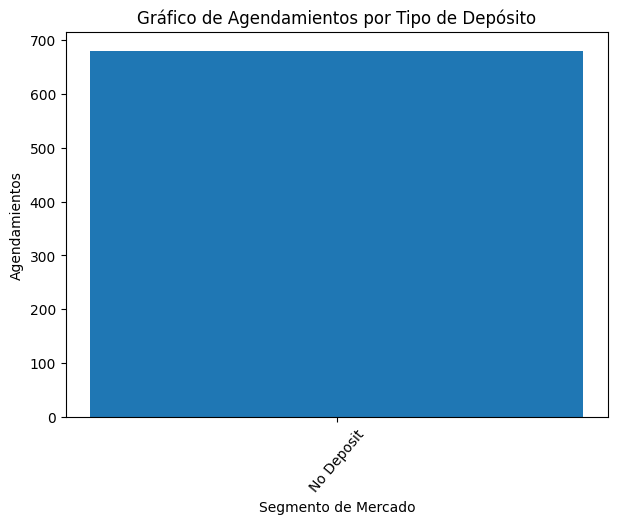

In [120]:
# No mostramos agendamientos cancelados o sin días.
df_tipo_deposito_agrupados = df[
    (df["is_canceled"] == 0.0) & (df["stays_nights"] == 0.0)
].groupby("deposit_type")["stays_nights"].agg("count").reset_index().sort_values("stays_nights", ascending=False)

tipos_deposito = df_tipo_deposito_agrupados["deposit_type"]
reservas_totales = df_tipo_deposito_agrupados["stays_nights"]

plt.figure(figsize=(7, 5))
plt.bar(tipos_deposito, reservas_totales)
plt.title("Gráfico de Agendamientos por Tipo de Depósito")
plt.xlabel("Segmento de Mercado")
plt.ylabel("Agendamientos")
plt.xticks(rotation=50)
plt.show()

Al parecer no hay clientes que dejen un depósito en este dataset.

#### Gráfico de Correlación entre tiempo de lead y días de espera.

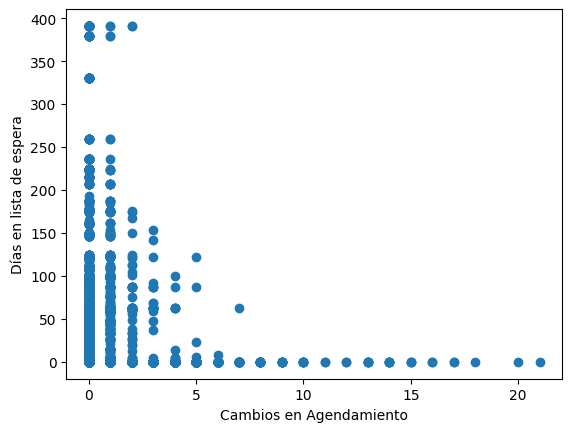

In [121]:
plt.scatter(df["booking_changes"], df["days_in_waiting_list"])
plt.xlabel("Cambios en Agendamiento")
plt.ylabel("Días en lista de espera")
plt.show()

Este gráfico es para visualizar que tantos cambios hay de acuerdo a los días que los clientes estén en la lista de espera.

#### Gráfico de Lead vs Ganancias

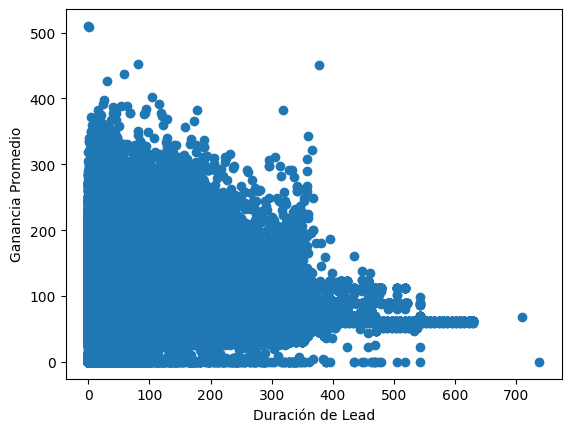

In [122]:
df_sin_adr_outlier = df[df["adr"] < 5000]

plt.scatter(df_sin_adr_outlier["lead_time"], df_sin_adr_outlier["adr"])
plt.xlabel("Duración de Lead")
plt.ylabel("Ganancia Promedio")
plt.show()

### Análisis adicional

Visualizamos las estadísticas descriptivas del dataset.

In [123]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,stays_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831175,0.062518,0.571363,2016-07-30 00:24:47.883407104,2016-08-28 16:39:45.727447808,3.427900
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00,2016-03-13 00:00:00,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00,2016-09-06 00:00:00,3.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00,2017-03-18 00:00:00,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,2017-08-31 00:00:00,69.000000
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535679,0.245291,0.792798,NaN,NaN,2.557439


#### Matriz de Correlación de Columnas Numéricas


Matriz de Correlación (Pearson):


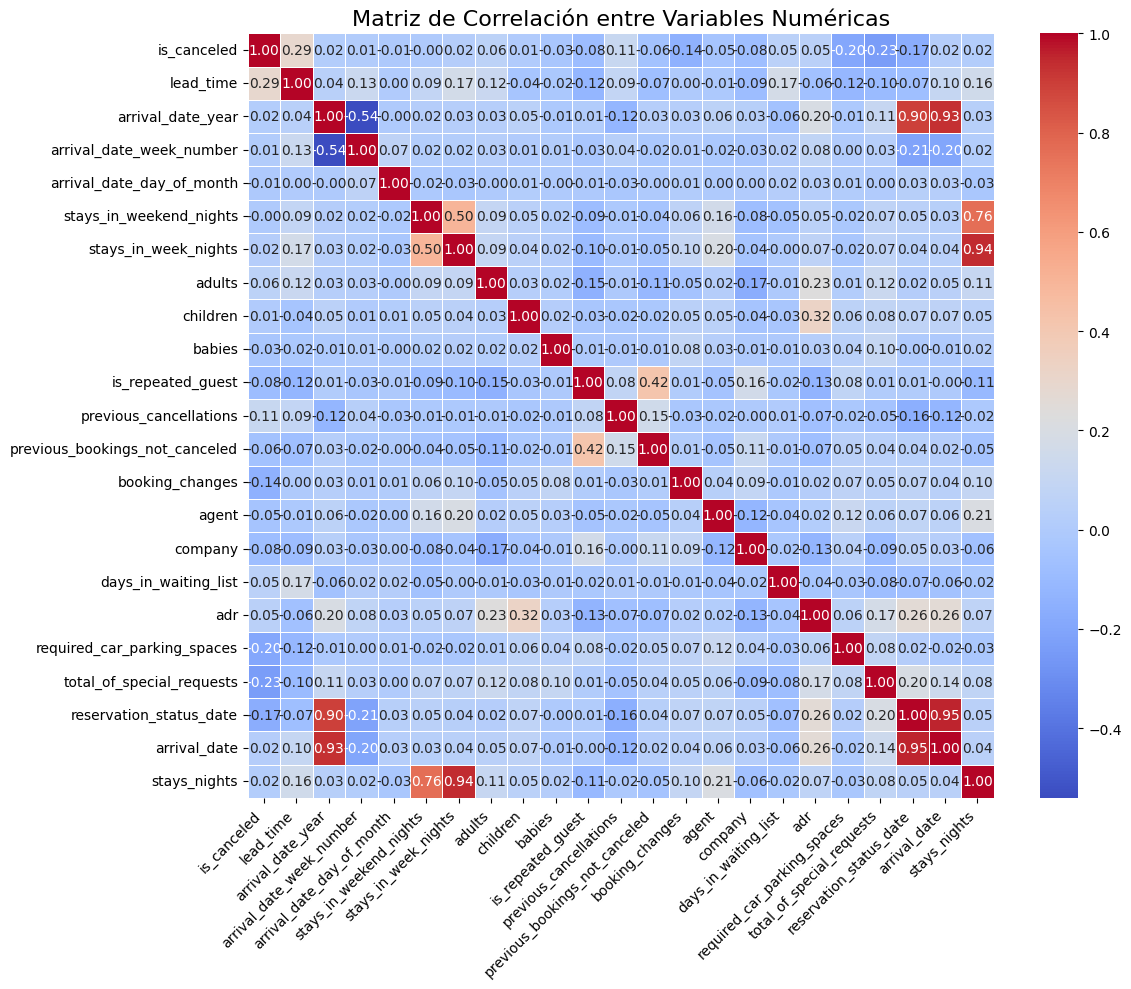

In [124]:
import seaborn as sns

# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_no_categoricas].corr(method='pearson')
# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))
# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Mostrar el gráfico
plt.tight_layout()
plt.show()